# 13-Exam Review (Python)
This is a short writeup of some of the key points that we have covered in the course thus far. You should be familiar with these points.

## Motivation
- What specific problems are commonly solved in chemical engineering?
- What are some societal problems that chemical engineers are solving?

## Functions
- How to import modules
- How to call a function with arguments
- How to define a function with arguments
- How and why to use default values for arguments
- Understand what a local and global variable
- Understand if statements and how to use them

For example, how would you make a function to calculate the area of a circle with a default value of 3?

In [1]:
import numpy as np

In [2]:
def function(r=3):
  return np.pi*r**2

In [3]:
function()

28.274333882308138

## Objects
- Understand what a class and object are
- How to specify a class and create an object with the param package
- Understand the benefits of using classes and objects

For example, in Homework 9, you created a model to estimate the time that your body temperature would fall to 35 C from 37 C. You used odeint to determine the time that would take given the balance on the energy change of the body with heat being lost due to radiation. How would you incorporate that into an object?

In [4]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import param

In [5]:
class body(param.Parameterized):
  mass = param.Number(90,doc='mass of body in kilograms (SI)')
  surfacearea = param.Number(1.8,doc = 'average homie surface area of body in square meters (SI)')
  heatcapacity = param.Number(4200,doc = 'heat capacity in units of J/kg/K (SI)')
  heatgen = param.Number(100,doc='heat generated by body in units of W (SI)')
  sigma = param.Number(5.67e-8,doc='boltzmans constant in W/m^2*K^4 (SI)')
  initialtemp = param.Number(37+273,doc='initial temperature in K (SI)')
  times = param.Array(np.linspace(0,2000,100),doc='array of times in seconds (SI)')

  #Specify the derivative function # Energy balance: mass*Cp*dT/dt = heatgen - sigma*Area*T^4
  def dTdt(self,T,time):
      return (self.heatgen - self.sigma*self.surfacearea*T**4)/(self.mass*self.heatcapacity) #SI units of K/s

  def spacetemperature(self):
    return odeint(self.dTdt,self.initialtemp,self.times) #odeint(function,intial,arrayoftimes) to return array of temps

  def hypotime(self):
    (slope,inter) = np.polyfit(self.times,self.spacetemperature(),1) #fit my temperatures to a line
    return (35+273 - inter)/slope

In [6]:
clint = body()

In [7]:
clint.hypotime()

array([915.64490784])

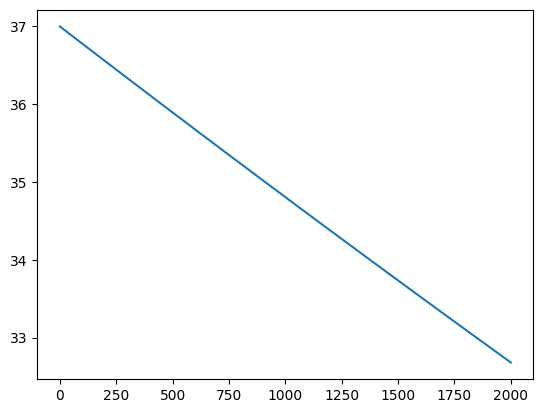

In [8]:
plt.plot(clint.times,clint.spacetemperature()-273)

y = mx + b
temps = slope*time + b

35 = slope*time + b

time = (35-b)/slope

In [12]:
slope,inter = np.polyfit(clint.times,clint.spacetemperature(),1)

In [13]:
hypotime = (35+273 - inter)/slope
print(hypotime)

[915.64490784]


## Debugging
- Understand difference between syntax, runtime, and logic errors
- Understand the debugging approaches for each error type
- Know about debugging tools such as `print` statements and simplifying code

## Units
- Understand dimensional analysis
- Understand how to track units through your code by using SI or other consistent units
- Understand how to work with english units in your code including gc = 32.174 lbm-ft/(lbf-s^2)

For example, if I have the following code, what units is P in?

In [ ]:
V = 1 #m^3/mol
T = 300 #K
R = 8314 #L-Pa/(mol-K)
P = R*T/V

## Equations
- Understand how to solve equations using linear algebra (Ax = b)
- Understand how to solve equations using root finding like fsolve (f(x) = 0)
- Understand how to use sympy
- Understand how to solve equations using optimization (minimize f(x))
- Understand the difference between coupled and uncoupled equations and linear and non-linear
- Understand what an array is

For example, the following system of equations can be solved any number of ways.

$$
x + y + q = 4 \\
x + z = 5 \\
y + z = 6 \\
q + x + y = 10
$$

How would you go about solving the above using linear algebra?

## ODE's and Derivatives
- Understand how to solve derivatives using symbolic calculus with sympy
- Understand how to solve a differential equation using Euler's method and odeint

For example if you have the following differential equation (typical of a second order reaction), how would you solve it?

$$
\frac{dx}{dt} = -kx^2
$$

## Loops
- Understand how to use for and while loops

For example, the sequence of triangular numbers is generated by the following formula:

$$
T_n = \frac{n(n+1)}{2}
$$

Lets say you have an existing array of T = (0,1,3,6) and you want to add the next 10 triangular numbers to the array. How would you do that? The sum of the inverse of the Triangular array is a converging series, what is your estimate of the value of that converging series based on the 14 numbers in your array?

In [15]:
T = [0,1,3,6]
for i in range(10):
  n = i + 4
  T.append(int(n*(n+1)/2))

In [16]:
T

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91]

## Regression
- Understand how to use regression to fit a curve to data using scipy curve_fit and scipy minimize
- Understand how to use interpolation to estimate data between points
- Understand what pandas is and how to import data from a csv file

How would you use curve_fit to fit a parabolic curve to the following data?

$$
x = [1,2,3,3,4,5,5] \\
y = [1.23,3.9,9.3,9.1,16.3,25.5,26]
$$

How would you use minimize to do the same thing?

In [32]:
x = np.array([1,2,3,3,4,5,5])
y = np.array([1.23,3.9,9.3,9.1,16.3,25.5,26])

In [33]:
from scipy.optimize import minimize,curve_fit

In [34]:
def model(x,a,b,c):
  return a*x**2 + b*x + c

In [35]:
def error(p,y):
  return np.sum((y-model(x,*p))**2)

In [36]:
popt, pcov = curve_fit(model,x,y)
a,b,c = popt
print(a,b,c)

1.0856646216770778 -0.37014314928723824 0.45987730061231424


In [37]:
minimize(error,(1,1,1),args=(y,))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.1894642126827148
        x: [ 1.086e+00 -3.701e-01  4.599e-01]
      nit: 4
      jac: [-7.451e-09  0.000e+00 -1.118e-08]
 hess_inv: [[ 2.403e-02 -1.513e-01  1.917e-01]
            [-1.513e-01  9.903e-01 -1.330e+00]
            [ 1.917e-01 -1.330e+00  2.003e+00]]
     nfev: 28
     njev: 7

## File I/O
Make sure you now how to use pandas to read in data